### Precipitation dataset:
  
-  Livneh <br>
 /glade/campaign/mmm/c3we/mingge/LIVNEH <br>
 lat = 444 ;  25.15625, 25.21875, ....,  52.78125, 52.84375
 lon = 922 ;  235.40625, 235.46875, ......, 292.90625, 292.96875 (=-67.03125)

- processed dataset: <br>
  /glade/campaign/mmm/c3we/mingge/CESM     <br>
   
 
     

In [1]:
# Kernel casper_2020

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import mapclassify as mc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.util as cutil
import matplotlib.ticker as mticker
#from matplotlib import ticker, cm
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogFormatter 
import matplotlib.colors as mcolors
%matplotlib inline
from scipy.stats import pearsonr 

#GeoCAT Specific packages
from geocat.viz import util as gvutil
import geocat.datafiles as gdf
from IPython.display import IFrame
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geoplot as gplt
import geopandas as gpd
import mapclassify as m
#from psif_func import plot_seasonal_4
from importlib import reload
import psif_func
import config

reload(psif_func)
 
from psif_func import plot_diff_3
from psif_func import plot_seasonal
from psif_func import plot_seasonal_12
from psif_func import plot_mpas_diff_3
from psif_func import plot_box_shp_3
from psif_func import plot_ts_shp_2
from psif_func import ax_coastlines_country
from psif_func import plot_ts_shp_seasonal_trend
from psif_func import seasonal_mean2total_3d
from psif_func import seasonal_mean2total_4d
from psif_func import plot_seasonal_trend_HUC2
from psif_func import plot_seasonal_trend_HUC2_12
from psif_func import cal_trend_huc2_1d
from psif_func import plot_trend_HUC2

In [10]:
# DJF, MAM, JJA, SON
nday_season = [90,92,92,91]
n_season = len(nday_season)
n_shp = 18

year_s = 1981
year_e = 2010
n_year = 30

year_fs = 2041
year_fe = 2070

# coordinates
year_h = range(year_s, year_e+1, 1)
year_f = range(year_fs, year_fe+1, 1)

In [11]:
dir_plot = '/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/'
dir_cesm = '/glade/campaign/mmm/c3we/mingge/CESM/'
dir_liv  = '/glade/campaign/mmm/c3we/mingge/LIVNEH/'

In [12]:
flnm_p95_liv       = 'p95_LIVNEH_1981-2010_wy.nc'
flnm_mean_liv      = 'prec_mean_1981-2010_livneh_wy.nc'
flnm_prec_shp_liv  = 'prec_1981-2010_livneh_shp_wy.nc'

In [13]:
## CESM
flnm_cesm = 'prec_1981-2010_CESM_LivnehGrid_wy.nc'
flnm_shp_cesm = 'prec_1981-2010_cesm_shp_wy.nc'
flnm_shp_cesm_f = 'prec_2041-2070_cesm_shp_wy.nc'
flnm_f = 'prec_mean_2041-2070_CONUS_wy.nc'
flnm_h = 'prec_mean_1981-2010_CONUS_wy.nc'


In [14]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)  

with xr.open_dataset(dir_liv + flnm_p95_liv) as ds_p95_liv:
  print(dir_liv + flnm_p95_liv) 

with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 


/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/p95_LIVNEH_1981-2010_wy.nc
/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc


In [15]:
with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 


/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


In [16]:
ds_mean_liv.coords['lon'] =  ds_mean_liv.coords['lon'] - 360.
ds_p95_liv.coords['lon']  = ds_p95_liv.coords['lon']  - 360.
ds_prec_cesm.coords['lon'] =  ds_prec_cesm.coords['lon']- 360.
ds_mean_liv.coords['year'] = ds_prec_cesm.coords['year']

### Figures for the water availability paper

 - Figure 1: Mean annual daily rainfall (climatology)

<Figure size 1152x768 with 0 Axes>

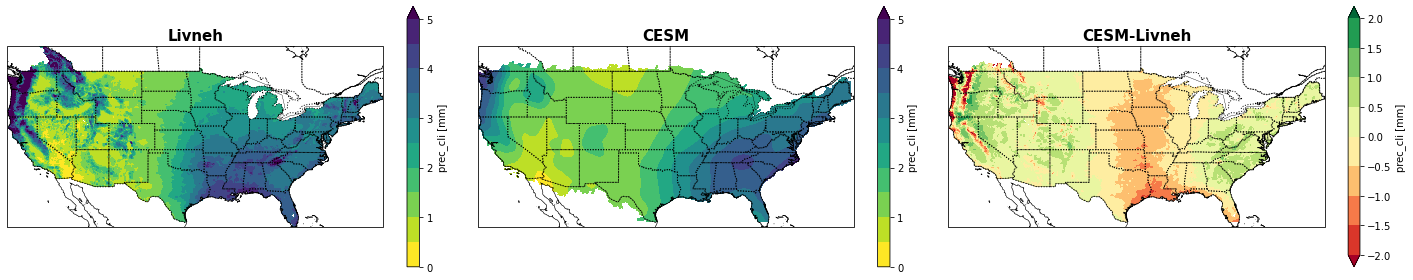

In [47]:
prec_liv  = ds_mean_liv.prec_cli
prec_cesm = ds_prec_cesm.prec_cli_3d.mean(dim=('member'))
prec_dif  = prec_cesm - prec_liv 

data_3d = xr.concat([prec_liv, prec_cesm, prec_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 5, num=11)
cnlevel_dif = np.linspace(-2, 2, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "prec_cesm_livneh_cli.png", bbox_inches='tight');

 - Supplemental figure 1: Mean seasonal daily rainfall with same columns, and four row for DJF, MAM, JJA, SON  

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


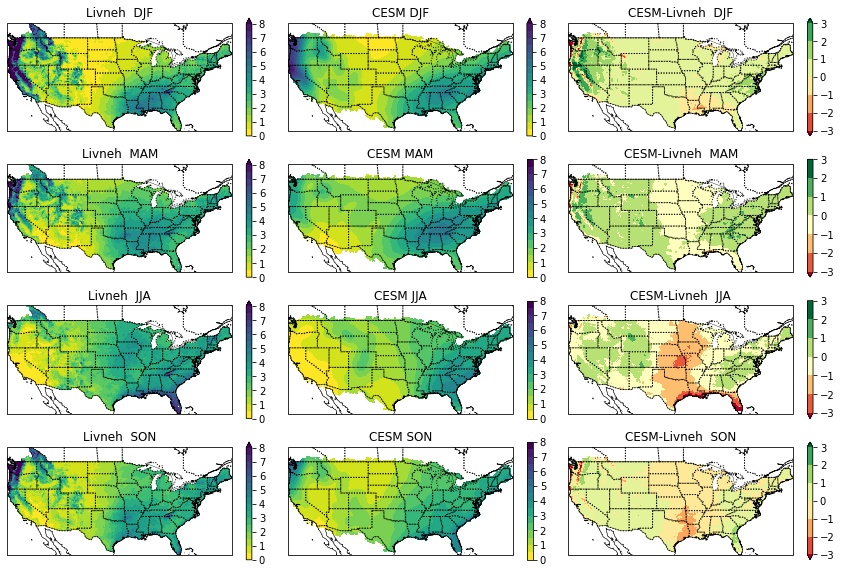

In [18]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)

with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

prec_season_cesm = ds_prec_cesm.prec_season_4d.mean(dim=('member'))
prec_season_liv  = ds_mean_liv.prec_season_3d 
prec_season_dif  = prec_season_cesm - prec_season_liv

data_4d = xr.concat([prec_season_liv, prec_season_cesm, prec_season_dif] , "new_dim")
 
cnlevel_0 = np.linspace(0, 8, num=17)
cnlevel_dif = np.linspace(-3, 3, num=7)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif)

plt.savefig(dir_plot + "prec_cesm_livneh_seasonal.png", bbox_inches='tight', dpi=100) 

#### Figure 2: Average number of wet days per month 1981-2010 for each of HUC2 watersheds. 
Plotted in 5 columns/4 rows matching HUC map (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ nwd_cesm_livneh_month_ts_huc2.png


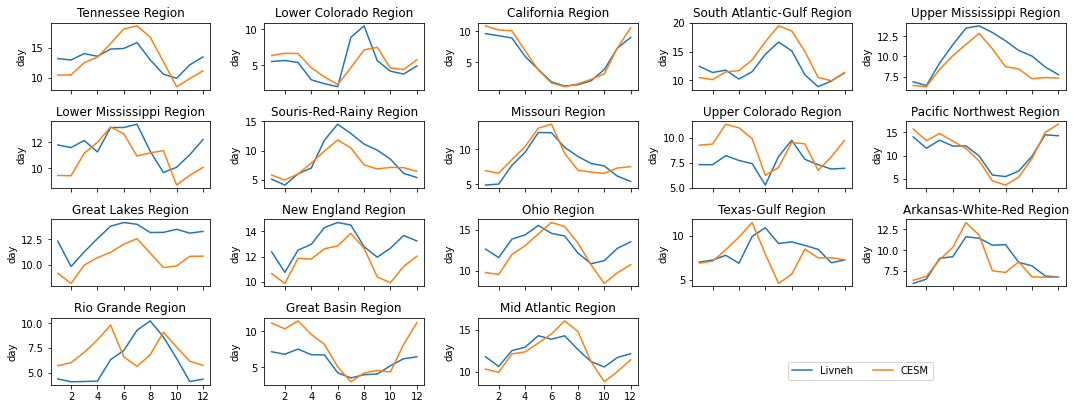

In [48]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)  

nwd_month_liv  = ds_prec_shp_liv.nwd_month_3d
nwd_month_cesm = ds_prec_shp_cesm.nwd_month_4d.mean(dim='member').transpose('month','shapefile_area')

# coordinates
month = range(1,13, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([nwd_month_liv, nwd_month_cesm], "none")
 
# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[month, range(1,19,1), models], dims=["month", "huc2", 'model'])
               
plot_ts_shp_2(data_3d, labels, 'month', 'day')

plt.savefig(dir_plot + "nwd_cesm_livneh_month_ts_huc2.png")
print(dir_plot, "nwd_cesm_livneh_month_ts_huc2.png")

#### Supplemental figure 2: Mean seasonal total rainfall (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


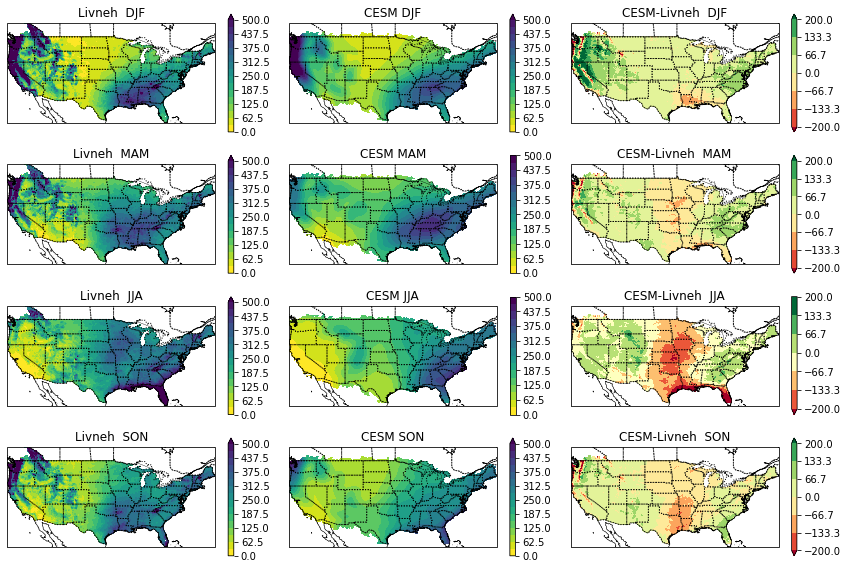

In [20]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)

with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

prec_season_cesm = ds_prec_cesm.prec_season_4d.mean(dim=('member'))
prec_season_liv = ds_mean_liv.prec_season_3d 

prec_season_liv  = seasonal_mean2total_3d(prec_season_liv, 0)
prec_season_cesm = seasonal_mean2total_3d(prec_season_cesm, 0)

prec_season_dif = prec_season_cesm - prec_season_liv

data_4d = xr.concat([prec_season_liv, prec_season_cesm, prec_season_dif] , "new_dim")
 
cnlevel_0 = np.linspace(0, 500, num=17)
cnlevel_dif = np.linspace(-200, 200, num=7)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif)

plt.savefig(dir_plot + "prec_cesm_livneh_seasonal_total.png", bbox_inches='tight', dpi=100) 

#### Figure 3: Average number of wet days per year as a spatial map. a) observations, b) CESM2 c) difference  (MG) 

<Figure size 1152x768 with 0 Axes>

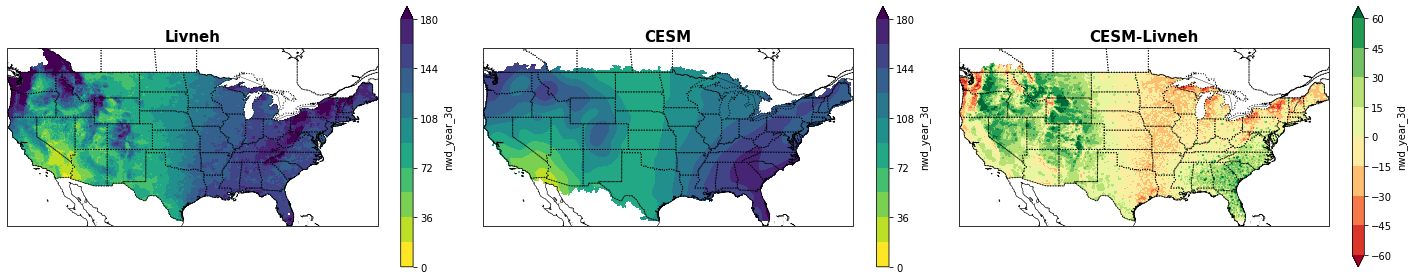

In [21]:
nwd_liv  = ds_mean_liv.nwd_year_3d.mean(dim=('year'))
nwd_cesm = ds_prec_cesm.nwd_year_4d.mean(dim=('member','year'))
nwd_dif  = nwd_cesm - nwd_liv 

data_3d = xr.concat([nwd_liv, nwd_cesm, nwd_dif] , "new_dim")
title_s = ['Livneh','CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(0, 180, num=11)
cnlevel_dif = np.linspace(-60, 60, num=9)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "nwd_cesm_liv_cli.png", bbox_inches='tight');


#### Supplemental Figure 3: Average number of wet days per season 

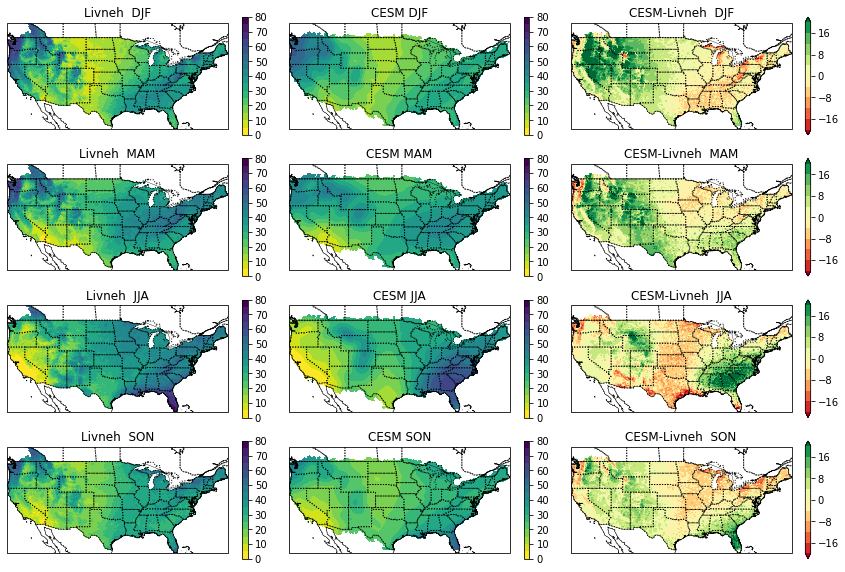

In [22]:
nwd_season_cesm = ds_prec_cesm.nwd_season_4d.mean(dim=('member'))
nwd_season_liv  = ds_mean_liv.nwd_season_3d 
nwd_season_dif  = nwd_season_cesm - nwd_season_liv

data_4d = xr.concat([nwd_season_liv, nwd_season_cesm, nwd_season_dif], "new_dim")
 
cnlevel_0 = np.linspace(0, 80, num=17)
cnlevel_dif = np.linspace(-20, 20, num=11)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif)

plt.savefig(dir_plot + "nwd_cesm_livneh_seasonal.png", bbox_inches='tight', dpi=100) 

#### Figure 4: Mean annual rainfall on wet days/standardised daily intensity index for a) observations derived from Livneh 1981-2010; b) CESM2 1981-2010; c) difference CESM2 minus observations (MG)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


<Figure size 1152x768 with 0 Axes>

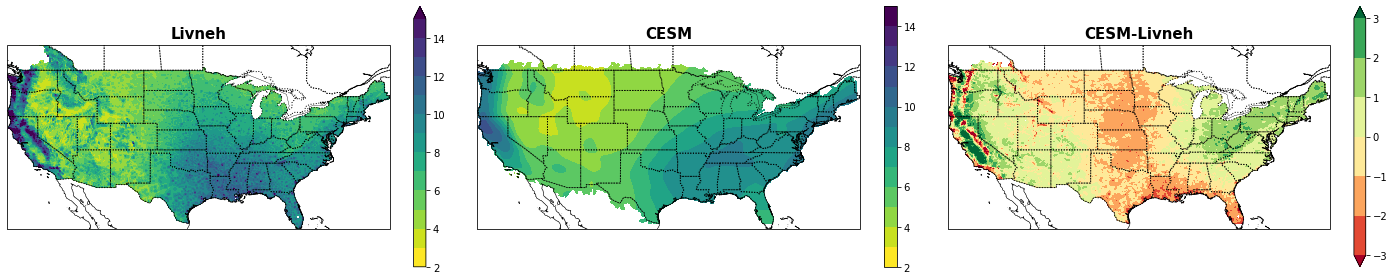

In [23]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)

with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

prec_year_cesm = ds_prec_cesm.prec_year_4d.mean(dim=('member','year'))
prec_year_liv  = ds_mean_liv.prec_year_3d.mean(dim=('year'))
nwd_year_liv   = ds_mean_liv.nwd_year_3d.mean(dim=('year'))
nwd_year_cesm  = ds_prec_cesm.nwd_year_4d.mean(dim=('member','year'))

prec_intensity_liv  = prec_year_liv*365/nwd_year_liv
prec_intensity_cesm = prec_year_cesm*365/nwd_year_cesm
prec_dif = prec_intensity_cesm - prec_intensity_liv 

data_3d = xr.concat([prec_intensity_liv, prec_intensity_cesm, prec_dif] , "new_dim")
title_s = ['Livneh', 'CESM', 'CESM-Livneh']

cnlevel_0   = np.linspace(2, 15, num=14)
cnlevel_dif = np.linspace(-3, 3, num=7)

fig = plt.figure(figsize=(12,8), dpi=96) 
plot_mpas_diff_3(data_3d, title_s, cnlevel_0, cnlevel_dif);

plt.savefig(dir_plot + "prec4wetday_cesm_livneh.png", bbox_inches='tight');

#### Supplemental figure 4: Mean seasonal daily rainfall on wet days (MG)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_mean_1981-2010_livneh_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_CESM_LivnehGrid_wy.nc


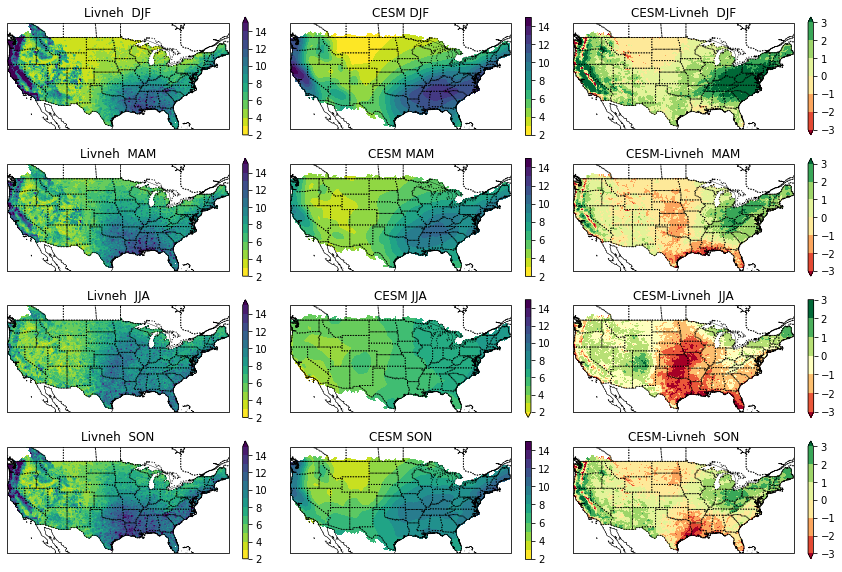

In [24]:
with xr.open_dataset(dir_liv + flnm_mean_liv) as ds_mean_liv:
  print(dir_liv + flnm_mean_liv)

with xr.open_dataset(dir_cesm + flnm_cesm ) as ds_prec_cesm:
  print(dir_cesm + flnm_cesm)

prec_season_cesm = ds_prec_cesm.prec_season_4d.mean(dim=('member'))
prec_season_liv  = ds_mean_liv.prec_season_3d
nwd_season_liv   = ds_mean_liv.nwd_season_3d
nwd_season_cesm  = ds_prec_cesm.nwd_season_4d.mean(dim=('member'))

prec_season_liv  = seasonal_mean2total_3d(prec_season_liv, 0)
prec_season_cesm = seasonal_mean2total_3d(prec_season_cesm, 0)

prec_intensity_liv  = prec_season_liv/nwd_season_liv
prec_intensity_cesm = prec_season_cesm/nwd_season_cesm
prec_intensity_dif  = prec_intensity_cesm - prec_intensity_liv

data_4d = xr.concat([prec_intensity_liv, prec_intensity_cesm, prec_intensity_dif] , "new_dim")
 
cnlevel_0 = np.linspace(2, 15, num=14)
cnlevel_dif = np.linspace(-3, 3, num=7)

plot_seasonal_12(data_4d, cnlevel_0, cnlevel_dif)

plt.savefig(dir_plot + "prec4wetday_cesm_livneh_seasonal.png", bbox_inches='tight', dpi=100)

#### Figure 5.1: Time series of seasonal rainfall on wet days over 1981-2010 for each HUC (MG) for Livneh, CESM2 and difference 

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_livneh_season_ts_huc2.png


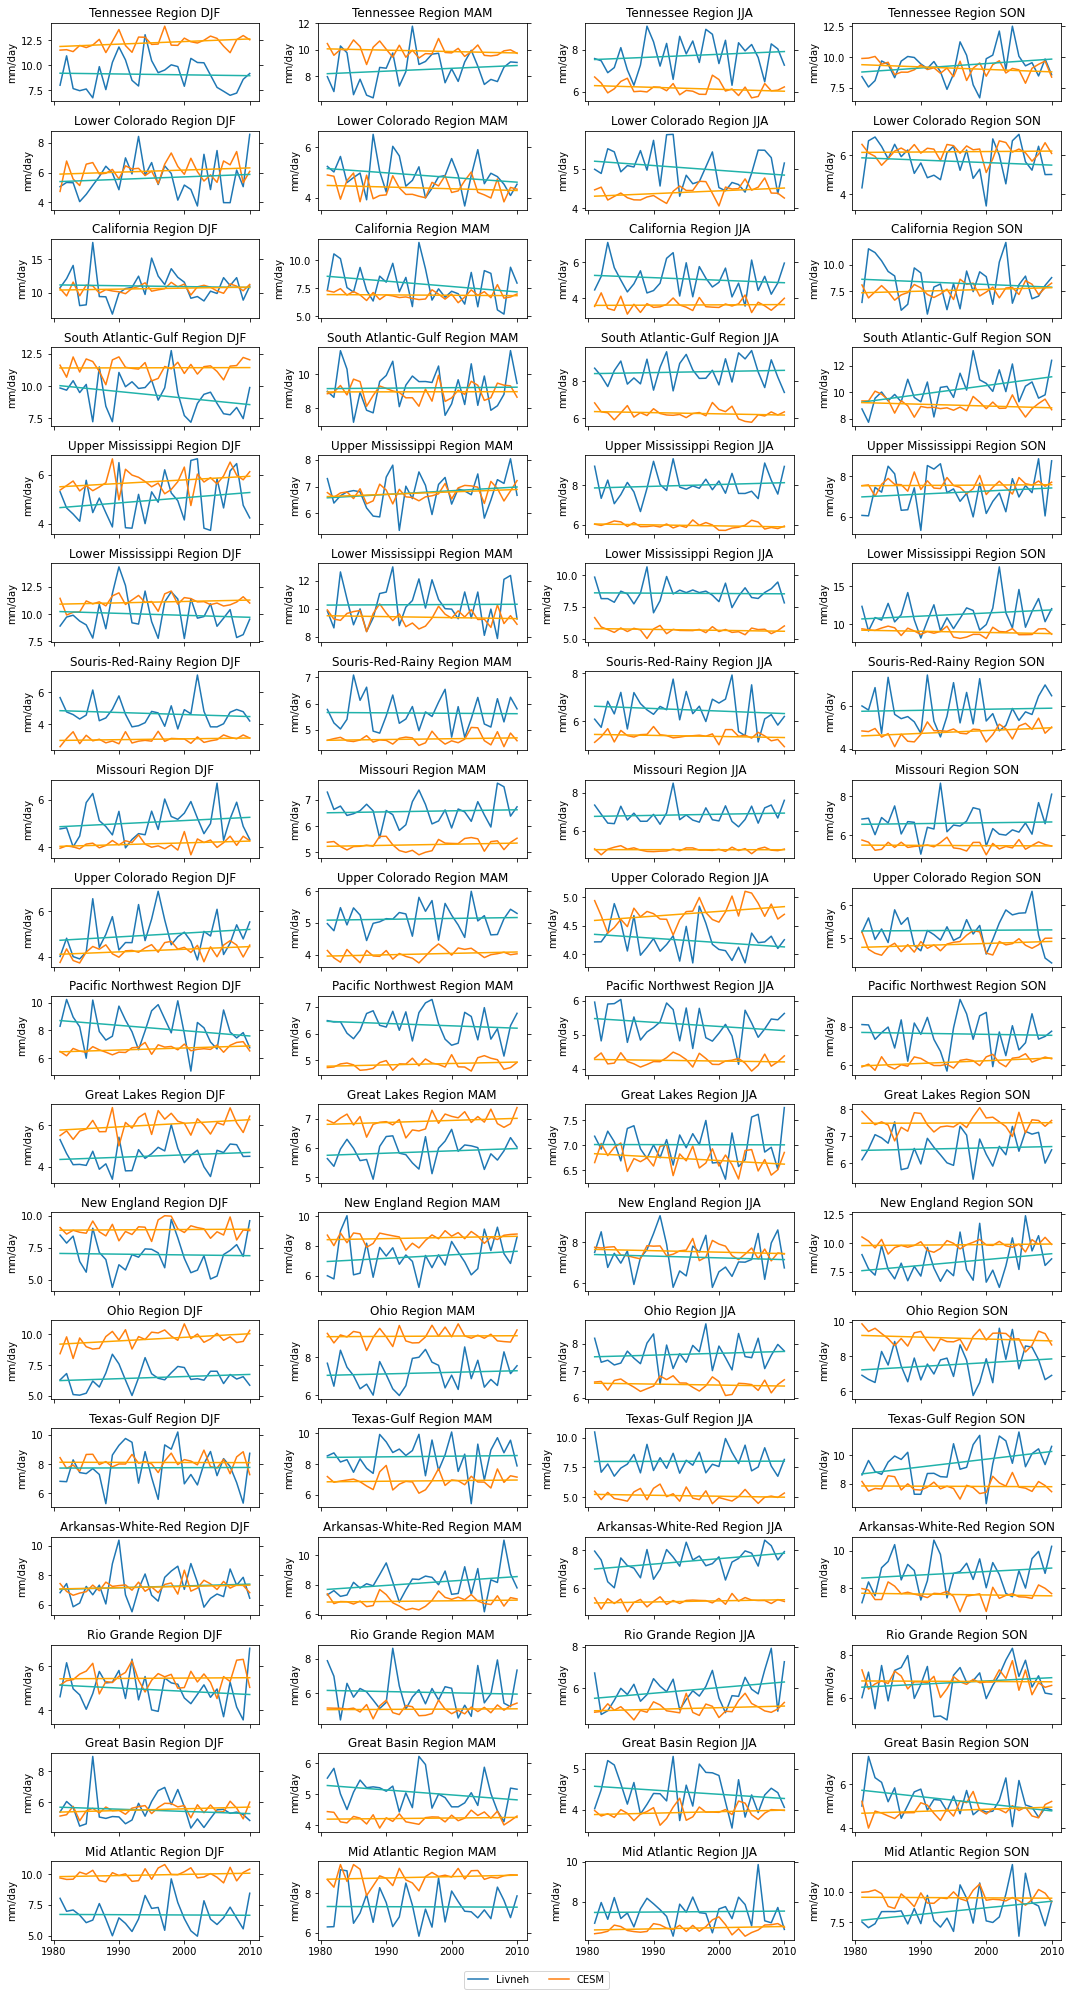

In [25]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)


# (year, shapefile_area, season) CESM:(member, shapefile_area, year, season) 
nwd_season_liv  = ds_prec_shp_liv.nwd_year_season_4d.transpose('shapefile_area','year','season')
nwd_season_cesm = ds_prec_shp_cesm.nwd_year_season_5d.mean(dim='member')

prec_season_liv  = (ds_prec_shp_liv.prec_year_season_4d).transpose('shapefile_area','year','season')
prec_season_cesm = (ds_prec_shp_cesm.prec_year_season_5d.mean(dim='member'))

prec_season_liv  = seasonal_mean2total_3d(prec_season_liv, 2)
prec_season_cesm = seasonal_mean2total_3d(prec_season_cesm, 2)

prec_season_liv  = prec_season_liv/nwd_season_liv  
prec_season_cesm = prec_season_cesm/nwd_season_cesm  

# coordinates
season = range(1, 5, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']

# concatenate xarray along a dimension 'none' and then change it to  'model'
da_4d = xr.concat([prec_season_liv, prec_season_cesm], "type")
da_4d.coords['year']=range(year_s, year_e+1,1)
 
plot_ts_shp_seasonal_trend(da_4d, year_s, year_e, labels, 'year', 'mm/day')

plt.savefig(dir_plot + "sdii_cesm_livneh_season_ts_huc2.png")
print(dir_plot, "sdii_cesm_livneh_season_ts_huc2.png")

#### Figure 5.2: Linear Trend of seasonal rainfall on wet days over 1981-2010 for each HUC (MG) for Livneh, CESM2 and difference
James and I decided to use the linear trend  (first degree polynomial. linear regression ) 
caculating changes over 30 years

##### 5.2.1 Livneh

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:133: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:134: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_livneh_season_huc2_map.png


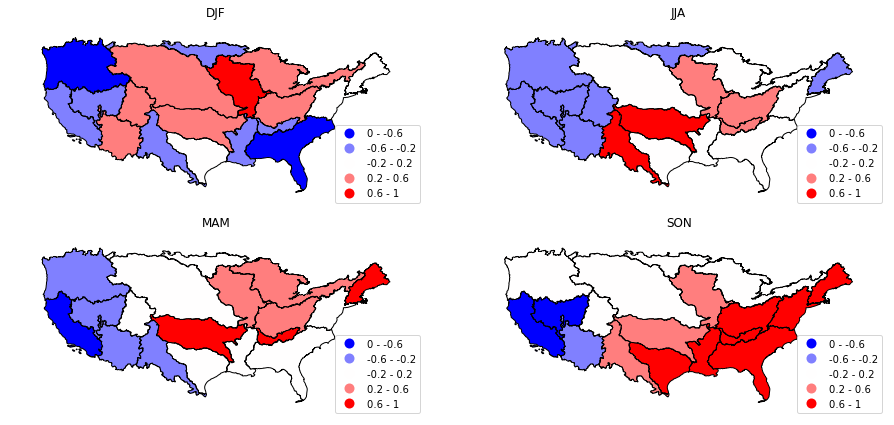

In [50]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)


# (year, shapefile_area, season) CESM:(member, shapefile_area, year, season) 
nwd_season_liv  = ds_prec_shp_liv.nwd_year_season_4d.transpose('shapefile_area','year','season')
nwd_season_cesm = ds_prec_shp_cesm.nwd_year_season_5d.mean(dim='member')

prec_season_liv  = (ds_prec_shp_liv.prec_year_season_4d).transpose('shapefile_area','year','season')
prec_season_cesm = (ds_prec_shp_cesm.prec_year_season_5d.mean(dim='member'))

prec_season_liv  = seasonal_mean2total_3d(prec_season_liv, 2)
prec_season_cesm = seasonal_mean2total_3d(prec_season_cesm, 2)

prec_season_liv  = prec_season_liv/nwd_season_liv  
prec_season_cesm = prec_season_cesm/nwd_season_cesm  

### Calculate trend using  linear regression 
# y = ax + b
# a, b = np.polyfit(X, Y, 1) 
trend_2d =np.zeros((n_shp, n_season))
for nr in range(n_shp):
    for ns in range(n_season):
        arr_1d = prec_season_liv[nr,:,ns]
        # first degree polynomial. linear regression 
        trend_2d[nr,ns] = np.polyfit(range(len(arr_1d)), arr_1d,1)[0] 
 
plot_seasonal_trend_HUC2(trend_2d*n_year, -1, 1, 'bwr')
plt.savefig(dir_plot + "sdii_livneh_season_huc2_map.png")
print(dir_plot, "sdii_livneh_season_huc2_map.png")

##### CESM

/glade/u/home/mingge/PSIF/psif_func.py:133: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:134: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_season_huc2_map.png


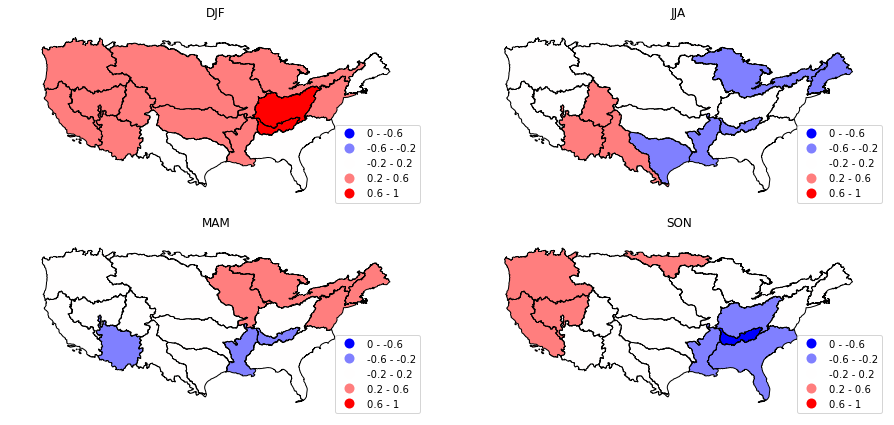

In [51]:
trend_2d =np.zeros((n_shp, n_season))
for nr in range(n_shp):
    for ns in range(n_season):
        arr_1d = prec_season_cesm[nr,:,ns]
        # first degree polynomial. linear regression 
        trend_2d[nr,ns] = np.polyfit(range(len(arr_1d)), arr_1d,1)[0] 
 
plot_seasonal_trend_HUC2(trend_2d*n_year, -1, 1, 'bwr')
plt.savefig(dir_plot + "sdii_cesm_season_huc2_map.png")
print(dir_plot, "sdii_cesm_season_huc2_map.png")

/glade/u/home/mingge/PSIF/psif_func.py:174: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:175: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_livneh_season_huc2_map.png


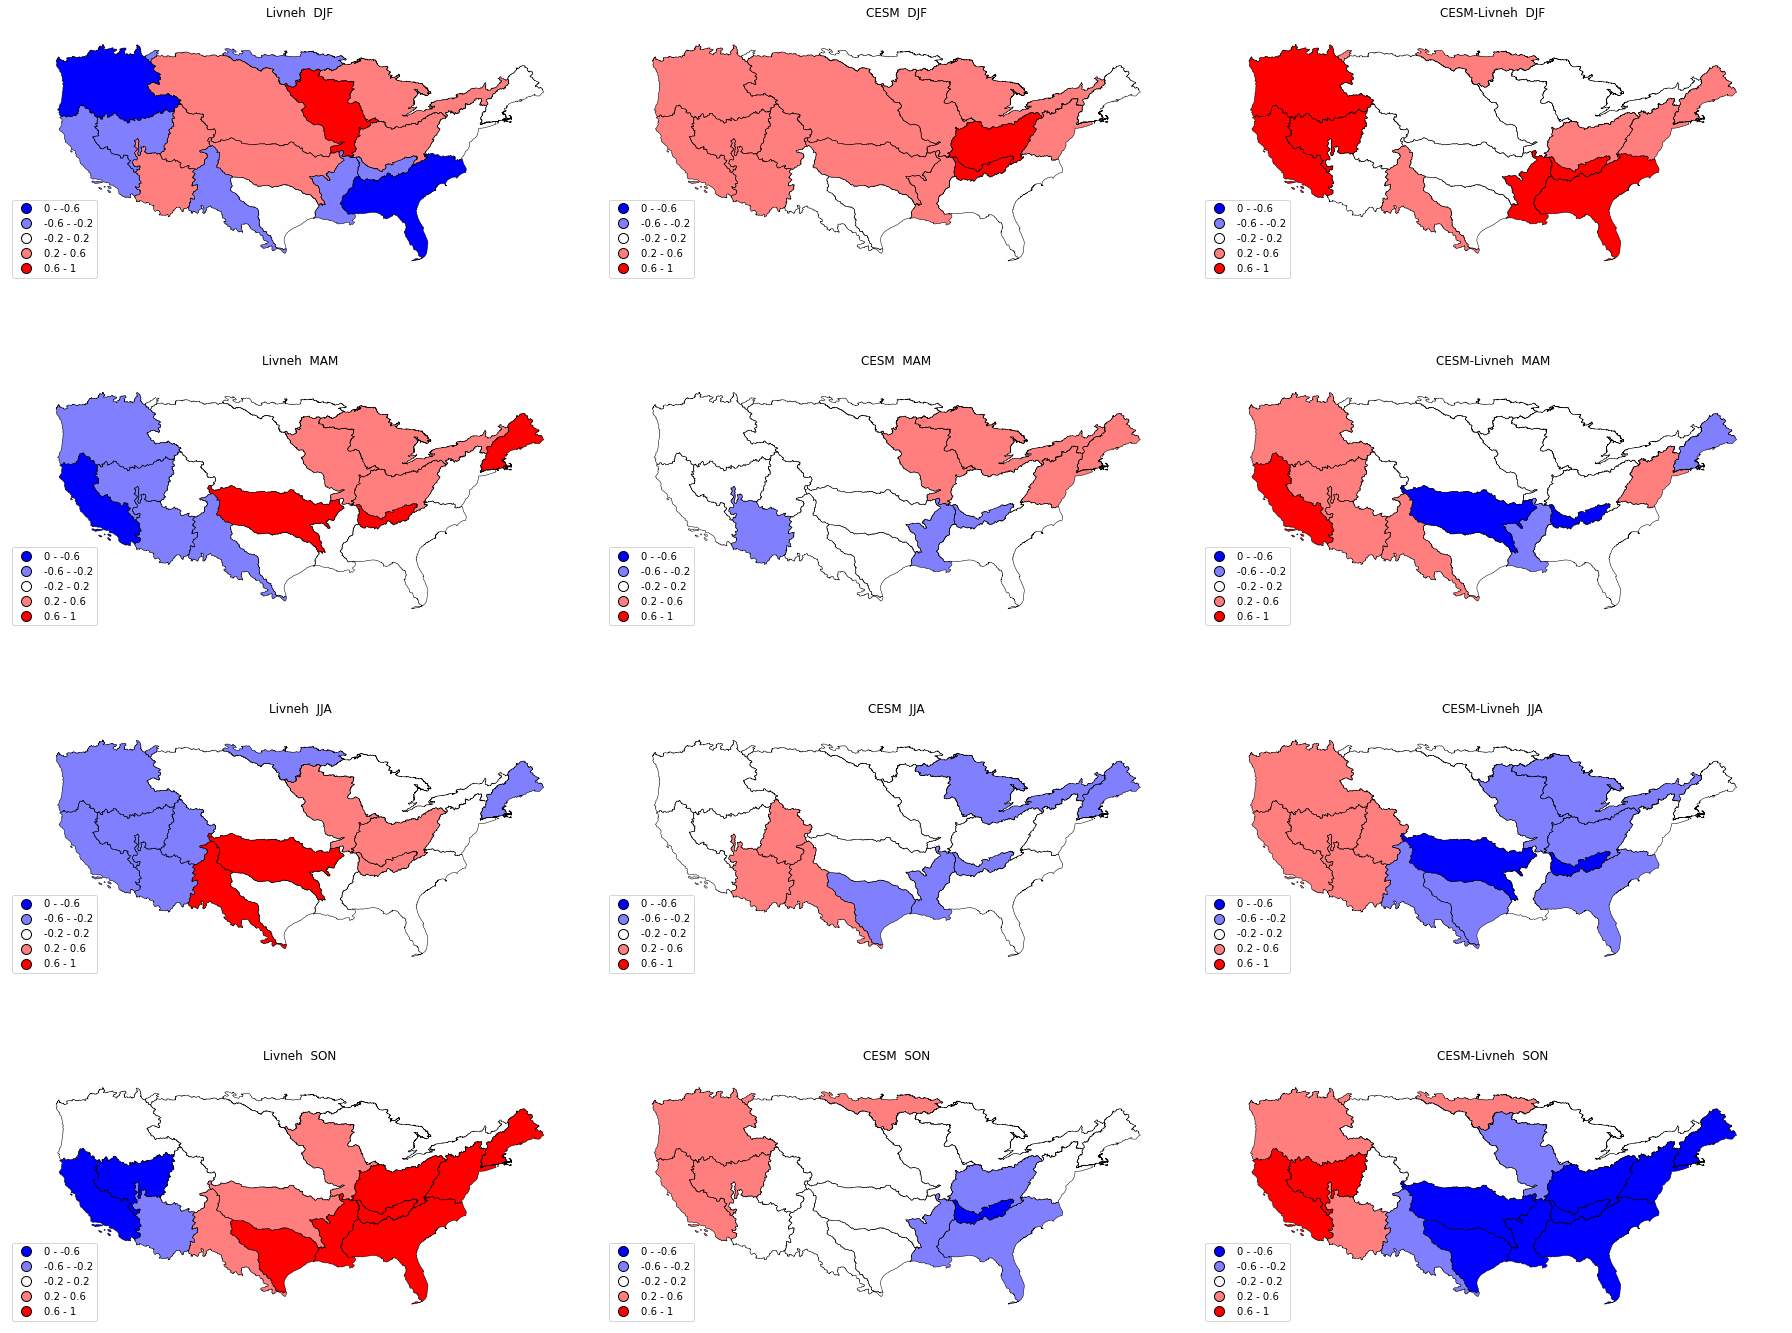

In [52]:
trend_3d =np.zeros((3,n_shp, n_season))
for nr in range(n_shp):
    for ns in range(n_season):
        arr_1d = prec_season_liv[nr,:,ns]
        # first degree polynomial. linear regression 
        trend_3d[0, nr,ns] = np.polyfit(range(len(arr_1d)), arr_1d, 1)[0] 
        trend_3d[1, nr,ns] = np.polyfit(range(len(arr_1d)), prec_season_cesm[nr,:,ns], 1)[0] 
        trend_3d[2, nr,ns] = np.polyfit(range(len(arr_1d)), prec_season_cesm[nr,:,ns]-arr_1d, 1)[0]
        
plot_seasonal_trend_HUC2_12(trend_3d*n_year, -1, 1, 'bwr', ['Livneh ', 'CESM ', 'CESM-Livneh '])
plt.savefig(dir_plot + "sdii_cesm_livneh_season_huc2_map.png")
print(dir_plot, "sdii_cesm_livneh_season_huc2_map.png")
                                                                                                 

#### Supplemental figure 5 time series of changes in annual SDII for each HUC basin (MRT)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_livneh_annual_ts_huc2.png


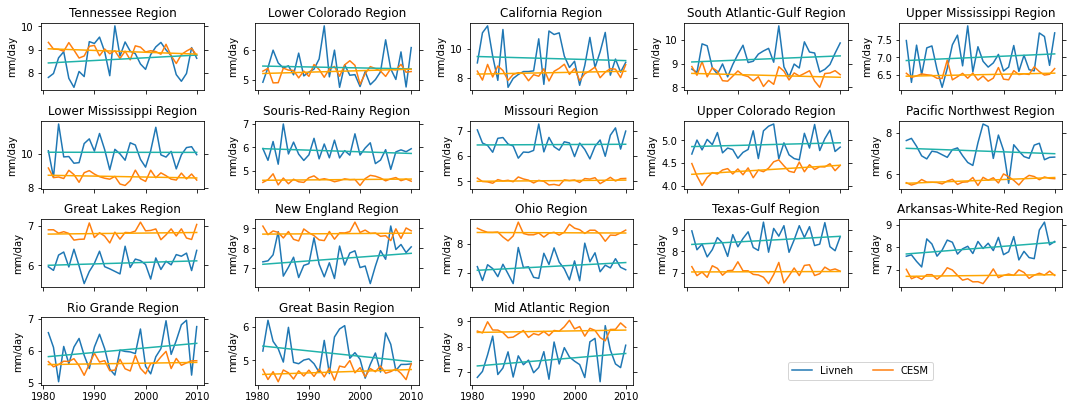

In [53]:
reload(psif_func)
from psif_func import plot_ts_shp_2

with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

nwd_year_liv  = ds_prec_shp_liv.nwd_year_3d
nwd_year_cesm = ds_prec_shp_cesm.nwd_year_4d.mean(dim='member').transpose('year','shapefile_area')

prec_year_liv  = (ds_prec_shp_liv.prec_year_3d)*365/nwd_year_liv
prec_year_cesm = (ds_prec_shp_cesm.prec_year_4d.mean(dim='member').transpose('year','shapefile_area'))*365/nwd_year_cesm

# coordinates
year = range(1981,2011, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
da_3d = xr.concat([prec_year_liv, prec_year_cesm], "none")

# add coordinates and dimension rename
da_3d=xr.DataArray(da_3d, coords=[range(year_s, year_e+1,1), range(1,19,1), models], dims=["year", "huc2", "models"])

plot_ts_shp_2(da_3d, labels, 'year', 'mm/day')

plt.savefig(dir_plot + "sdii_cesm_livneh_annual_ts_huc2.png")
print(dir_plot, "sdii_cesm_livneh_annual_ts_huc2.png")

#### Supplemental figure 6.1 percentage change in annual SDII (MG)  

In [30]:
def cal_percentage_change(arr_1d):
    '''
    calculate percentage change over previous value
    '''
    n_dim = len(arr_1d)
    aa = np.zeros(n_dim)
    aa[0] = 'nan'
    for nn in range(1,n_dim):
        if arr_1d[nn-1] == 0:
            arr_1d[nn-1] == 'nan'
        else:
            aa[nn]=(arr_1d[nn]-arr_1d[nn-1])/arr_1d[nn-1]*100.0
    return aa

with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

n_shp = len(ds_prec_shp_liv.shapefile_area)

nwd_year_liv  = ds_prec_shp_liv.nwd_year_3d #.squeeze(drop=True)
nwd_year_cesm = ds_prec_shp_cesm.nwd_year_4d.mean(dim='member').transpose('year','shapefile_area')
 
prec_year_liv  = (ds_prec_shp_liv.prec_year_3d)*365/nwd_year_liv
prec_year_cesm = (ds_prec_shp_cesm.prec_year_4d.mean(dim='member').transpose('year','shapefile_area'))*365/nwd_year_cesm

for ns in range(n_shp):
    prec_year_liv[:, ns, 0] = cal_percentage_change(prec_year_liv[:, ns,0])
    prec_year_cesm[:, ns] = cal_percentage_change(prec_year_cesm[:, ns])
    
# coordinates
year = range(1981,2011, 1)
models = range(1, 3, 1)

labels=['Livneh','CESM']
# concatenate xarray along a dimension 'none' and then change it to  'model'
data_3d = xr.concat([prec_year_liv, prec_year_cesm], "none")

# add coordinates and dimension rename
data_3d=xr.DataArray(data_3d, coords=[year, range(1, n_shp+1), models], dims=["year", "huc2", 'model'])

reload(psif_func)
from psif_func import plot_ts_shp_2               

plot_ts_shp_2(data_3d, labels, 'year', 'percentage')

plt.savefig(dir_plot + "sdii_cesm_livneh_annual_ts_huc2.png")
print(dir_plot, "sdii_cesm_livneh_annual_ts_huc2_percentage.png")

#### Supplemental figure 6.2.1 LIVNEH percentage change (trend slop map) in annual SDII (MG) 
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_livneh_annual_huc2_map.png


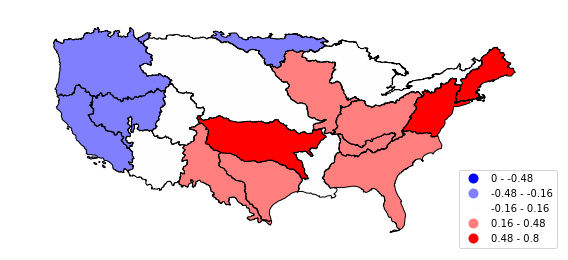

In [55]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

nwd_year_liv  = ds_prec_shp_liv.nwd_year_3d
prec_year_liv  = (ds_prec_shp_liv.prec_year_3d)*365/nwd_year_liv

trend_1d = cal_trend_huc2_1d(prec_year_liv)*n_year

plot_trend_HUC2(trend_1d,  -0.8, 0.8, 'bwr')   
plt.savefig(dir_plot + "sdii_livneh_annual_huc2_map.png")
print(dir_plot, "sdii_livneh_annual_huc2_map.png")

#### Supplemental figure 6.2.2 CESM (1981-2010) percentage change (trend slop map) in annual SDII 
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_h_annual_huc2_map.png


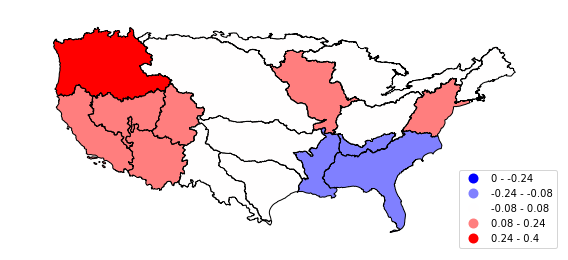

In [59]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm ) as ds_prec_shp_cesm:
  print(dir_cesm + flnm_shp_cesm) 

nwd_year_cesm = ds_prec_shp_cesm.nwd_year_4d.mean(dim='member').transpose('year','shapefile_area')
prec_year_cesm = (ds_prec_shp_cesm.prec_year_4d.mean(dim='member').transpose('year','shapefile_area'))*365/nwd_year_cesm

trend_1d = cal_trend_huc2_1d(prec_year_cesm)*n_year

plot_trend_HUC2(trend_1d,  -0.4, 0.4, 'bwr')   
plt.savefig(dir_plot + "sdii_cesm_h_annual_huc2_map.png")
print(dir_plot, "sdii_cesm_h_annual_huc2_map.png")

#### Supplemental figure 6.2.3 CESM (2041-2070) percentage change (trend slop map) in annual SDII 
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_f_annual_huc2_map.png


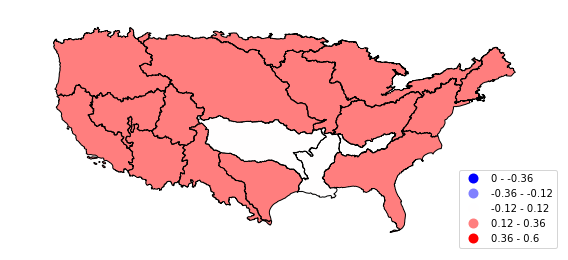

In [57]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_prec_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

nwd_year_cesm_f  = ds_prec_shp_cesm_f.nwd_year_4d.mean(dim='member').transpose('year','shapefile_area') 
prec_year_cesm_f = (ds_prec_shp_cesm_f.prec_year_4d.mean(dim='member').transpose('year','shapefile_area'))*365/nwd_year_cesm_f
trend_1d = cal_trend_huc2_1d(prec_year_cesm_f)*n_year
 
plot_trend_HUC2(trend_1d,  -0.6, 0.6, 'bwr')   
plt.savefig(dir_plot + "sdii_cesm_f_annual_huc2_map.png")
print(dir_plot, "sdii_cesm_f_annual_huc2_map.png")

#### percentage change in annual SDII 2041-2070 relative to 1981-2010

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_diff_annual_huc2_map.png


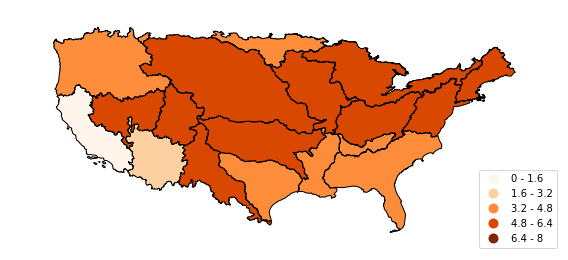

In [61]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_prec_shp_cesm_h:
  print(dir_cesm + flnm_shp_cesm)
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_prec_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

nwd_year_cesm  = ds_prec_shp_cesm_h.nwd_year_4d.mean(dim=('member','year'))
prec_year_cesm = ds_prec_shp_cesm_h.prec_year_4d.mean(dim=('member','year'))*365/nwd_year_cesm

nwd_year_cesm_f  = ds_prec_shp_cesm_f.nwd_year_4d.mean(dim=('member','year')) 
prec_year_cesm_f = ds_prec_shp_cesm_f.prec_year_4d.mean(dim=('member','year'))*365/nwd_year_cesm_f

sdii_change = (prec_year_cesm_f - prec_year_cesm)/prec_year_cesm*100.0

plot_trend_HUC2(sdii_change, 0, 8, 'Oranges')   
plt.savefig(dir_plot + "sdii_cesm_f_annual_huc2_map.png")
print(dir_plot, "sdii_cesm_diff_annual_huc2_map.png")

#### Percentage change in seasonal SDII 2040-2070 relative to 1981-2010 (MG)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:133: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plot seasonal trend map
/glade/u/home/mingge/PSIF/psif_func.py:134: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  trend_2d(n_shape, n_season)


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ sdii_cesm_diff_season_huc2_map.png


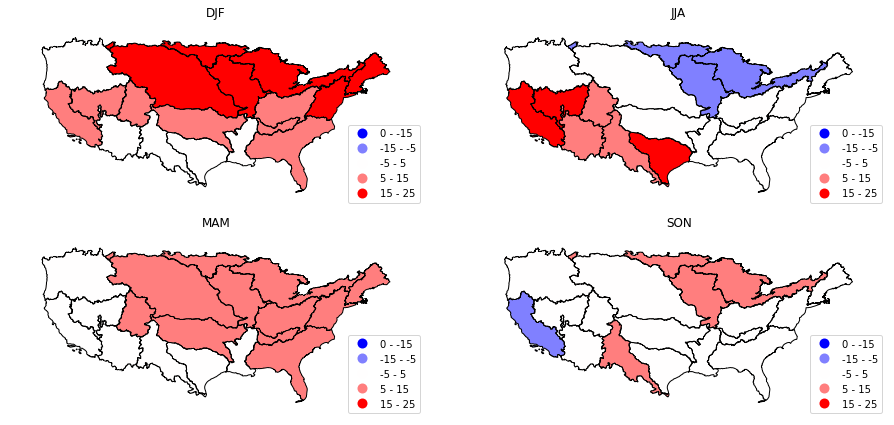

In [69]:
reload(psif_func)
from psif_func import seasonal_mean2total_2d

with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_prec_shp_cesm_h:
  print(dir_cesm + flnm_shp_cesm)
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_prec_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

nwd_season_cesm  = ds_prec_shp_cesm_h.nwd_season_4d.mean(dim=('member'))
prec_season_cesm = ds_prec_shp_cesm_h.prec_season_4d.mean(dim=('member'))

prec_season_cesm = seasonal_mean2total_2d(prec_season_cesm)

prec_season_cesm = prec_season_cesm/nwd_year_cesm

nwd_season_cesm_f  = ds_prec_shp_cesm_f.nwd_season_4d.mean(dim=('member')) 
prec_season_cesm_f = ds_prec_shp_cesm_f.prec_season_4d.mean(dim=('member')) 
prec_season_cesm_f = seasonal_mean2total_2d(prec_season_cesm_f)
prec_season_cesm_f = prec_season_cesm_f/nwd_year_cesm_f

sdii_change = (prec_season_cesm_f - prec_season_cesm)/prec_season_cesm*100.0
 
plot_seasonal_trend_HUC2(sdii_change, -25, 25, 'bwr')   
plt.savefig(dir_plot + "sdii_cesm_dif_season_huc2_map.png")
print(dir_plot, "sdii_cesm_diff_season_huc2_map.png")

#### Figure 6.1: Livneh Percent change in longest dry spell 1981-2010 (MG)
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cdd_livneh_annual_huc2_map.png


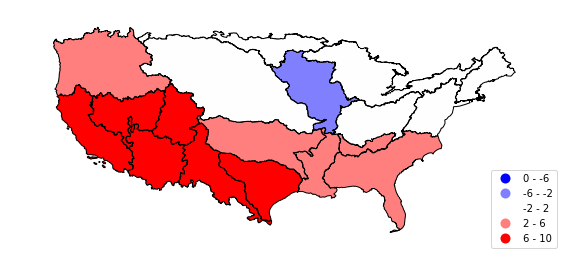

In [71]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

cdd_year_liv  = ds_prec_shp_liv.cdd_year_3d

trend_1d = cal_trend_huc2_1d(cdd_year_liv)*n_year

plot_trend_HUC2(trend_1d,  -10, 10, 'bwr')   
plt.savefig(dir_plot + "cdd_livneh_annual_huc2_map.png")
print(dir_plot, "cdd_livneh_annual_huc2_map.png")

#### Figure 6.2: CESM Percent change in longest dry spell 1981-2010
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cdd_cesm_annual_huc2_map.png


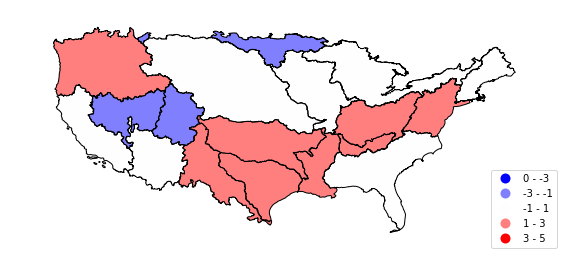

In [77]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_shp_cesm:
  print(dir_cesm +flnm_shp_cesm) 

cdd_year_cesm = ds_shp_cesm.cdd_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(cdd_year_cesm)*n_year

plot_trend_HUC2(trend_1d,  -5, 5, 'bwr')   
plt.savefig(dir_plot + "cdd_cesm_annual_huc2_map.png")
print(dir_plot, "cdd_cesm_annual_huc2_map.png")

#### Figure 6.3: CESM Percent change in longest dry spell 2041-2070
-> changes over 30 years (2041-2065)

/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cdd_cesm_f_annual_huc2_map.png


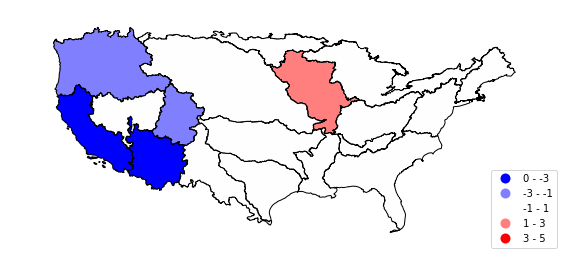

In [78]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

cdd_year_cesm_f = ds_shp_cesm_f.cdd_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(cdd_year_cesm_f)*n_year

plot_trend_HUC2(trend_1d,  -5, 5, 'bwr')   
plt.savefig(dir_plot + "cdd_cesm_f_annual_huc2_map.png")
print(dir_plot, "cdd_cesm_f_annual_huc2_map.png")

#### Figure 6.4: CESM Percent change in longest dry spell 2041-2070 relative to 1981-2010 (MG)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cdd_cesm_diff_annual_huc2_map.png


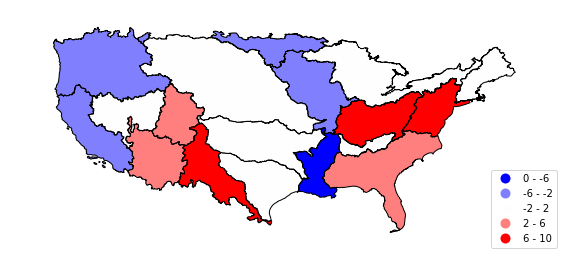

In [40]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)  

with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

cdd_cesm   = ds_shp_cesm.cdd_liv_3d.mean(dim='member')
cdd_cesm_f = ds_shp_cesm_f.cdd_liv_3d.mean(dim='member') 

cdd_change = (cdd_cesm_f - cdd_cesm)/cdd_cesm*100.0

plot_trend_HUC2(cdd_change,  -10, 10, 'bwr')   
plt.savefig(dir_plot + "cdd_cesm_diff_annual_huc2_map.png")
print(dir_plot, "cdd_cesm_diff_annual_huc2_map.png")

#### Figure 7.1: Percent change in longest wet spell 1981-2010
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/LIVNEH/prec_1981-2010_livneh_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cwd_livneh_annual_huc2_map.png


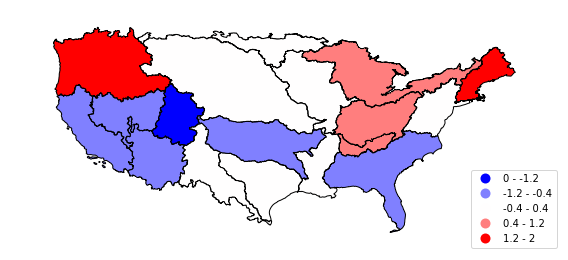

In [79]:
with xr.open_dataset(dir_liv + flnm_prec_shp_liv) as ds_prec_shp_liv:
  print(dir_liv + flnm_prec_shp_liv) 

cwd_year_liv  = ds_prec_shp_liv.cwd_year_3d

trend_1d = cal_trend_huc2_1d(cwd_year_liv)*n_year

plot_trend_HUC2(trend_1d,  -2, 2, 'bwr')   
plt.savefig(dir_plot + "cwd_livneh_annual_huc2_map.png")
print(dir_plot, "cwd_livneh_annual_huc2_map.png")

#### Figure 7.2: CESM Percent change in longest wet spell 1981-2010
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cwd_cesm_annual_huc2_map.png


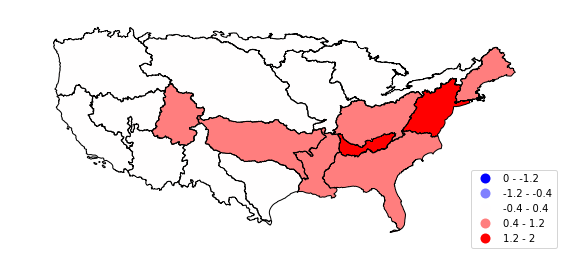

In [80]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_shp_cesm:
  print(dir_cesm +flnm_shp_cesm) 

cwd_year_cesm = ds_shp_cesm.cwd_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(cwd_year_cesm)*n_year

plot_trend_HUC2(trend_1d,  -2, 2, 'bwr')   
plt.savefig(dir_plot + "cwd_cesm_annual_huc2_map.png")
print(dir_plot, "cwd_cesm_annual_huc2_map.png")

#### Figure 7.3: CESM Percent change in longest wet spell 2041-2070
-> changes over 30 years (1981-2010)

/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  def plot_trend_HUC2(trend_1d, vmin, vmax, cmap_s):
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  '''


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cwd_cesm_f_annual_huc2_map.png


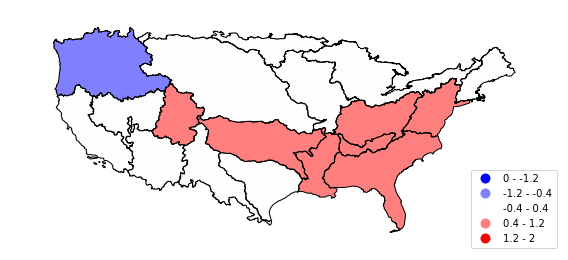

In [81]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

cwd_year_cesm_f = ds_shp_cesm_f.cwd_year_4d.mean(dim='member').transpose('year','shapefile_area')

trend_1d = cal_trend_huc2_1d(cwd_year_cesm_f)*n_year

plot_trend_HUC2(trend_1d,  -2, 2, 'bwr')   
plt.savefig(dir_plot + "cwd_cesm_f_annual_huc2_map.png")
print(dir_plot, "cwd_cesm_f_annual_huc2_map.png")

#### Figure 7.4: Percent change in longest wet spell 2041-2070 relative to 1981-2010 

/glade/campaign/mmm/c3we/mingge/CESM/prec_1981-2010_cesm_shp_wy.nc
/glade/campaign/mmm/c3we/mingge/CESM/prec_2041-2070_cesm_shp_wy.nc


/glade/u/home/mingge/PSIF/psif_func.py:98: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lon_centroid'] = shp_gpd.centroid.x
/glade/u/home/mingge/PSIF/psif_func.py:99: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_gpd['lat_centroid'] = shp_gpd.centroid.y


/glade/campaign/mmm/c3we/mingge/PSIF/PLOT/ cwd_cesm_diff_annual_huc2_map.png


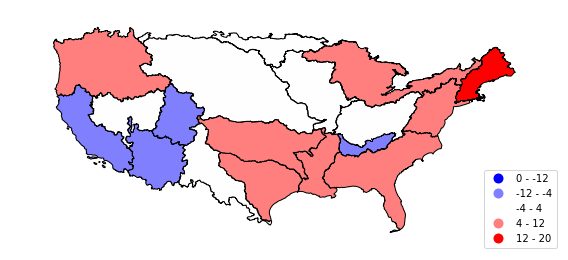

In [45]:
with xr.open_dataset(dir_cesm + flnm_shp_cesm) as ds_shp_cesm:
  print(dir_cesm + flnm_shp_cesm)  

with xr.open_dataset(dir_cesm + flnm_shp_cesm_f) as ds_shp_cesm_f:
  print(dir_cesm + flnm_shp_cesm_f) 

cwd_cesm   = ds_shp_cesm.cwd_liv_3d.mean(dim='member')
cwd_cesm_f = ds_shp_cesm_f.cwd_liv_3d.mean(dim='member') 

cwd_change = (cwd_cesm_f - cwd_cesm)/cwd_cesm*100.0

plot_trend_HUC2(cwd_change,  -20, 20, 'bwr')   
plt.savefig(dir_plot + "cwd_cesm_diff_annual_huc2_map.png")
print(dir_plot, "cwd_cesm_diff_annual_huc2_map.png")